## TO PREDICT which products will be in a user's NEXT ORDER

#### description : 
#### https://www.kaggle.com/c/instacart-market-basket-analysis

#### practice through imitation :
#### https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart

In [16]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()

isles=pd.read_csv('c:/Users/sol/Desktop/py_practice/instacart/aisles.csv')
departments=pd.read_csv('c:/Users/sol/Desktop/py_practice/instacart/departments.csv')
order_prior=pd.read_csv('c:/Users/sol/Desktop/py_practice/instacart/order_products__prior.csv')
order_train=pd.read_csv('c:/Users/sol/Desktop/py_practice/instacart/order_products__train.csv')
orders=pd.read_csv('c:/Users/sol/Desktop/py_practice/instacart/orders.csv')
products=pd.read_csv('c:/Users/sol/Desktop/py_practice/instacart/products.csv')
submission=pd.read_csv('c:/Users/sol/Desktop/py_practice/instacart/sample_submission.csv') 

In [6]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
order_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
submission.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


***
## 1. orders의 데이터타입이 어떤것이 있는지

In [14]:
cnt_srs=orders.eval_set.value_counts()
##cnt_srs=orders['eval_set'].value_counts()
cnt_srs

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

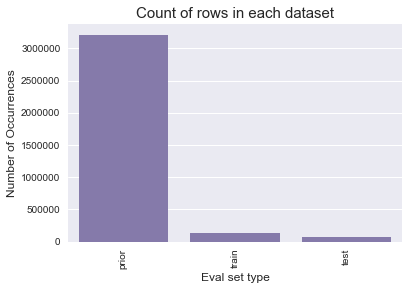

In [17]:
plt.figure(figsize=(6,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=1, color=color[3])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')

In [18]:
def get_unique_count(x):
    return len(np.unique(x))
cnt_srs=orders.groupby('eval_set')['user_id'].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [19]:
##cnt_srs = orders.groupby("user_id")["order_number"].max()
##cnt_srs = orders.groupby("user_id")["order_number"].aggregate(np.max)
cnt_srs = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs.order_number.min()

4

In [20]:
cnt_srs.order_number.max()

100

In [21]:
cnt_srs=cnt_srs.order_number.value_counts()
cnt_srs

4      23986
5      19590
6      16165
7      13850
8      11700
9      10190
10      9032
11      7815
12      6952
13      6236
14      5613
15      5191
16      4593
17      4139
18      3836
19      3390
20      3200
21      2921
22      2706
23      2605
24      2288
25      2186
26      2060
27      1908
28      1779
29      1601
30      1494
31      1474
32      1386
100     1374
       ...  
70       178
72       166
74       162
75       162
71       154
73       138
76       134
78       127
79       127
77       120
82       119
80       116
81       108
85       100
84        99
86        93
83        86
90        85
88        79
87        78
89        77
92        69
93        67
96        67
95        64
94        57
91        56
97        54
98        50
99        47
Name: order_number, Length: 97, dtype: int64

## 2. validate the claim that 4 to 100 orders of a custmer are given

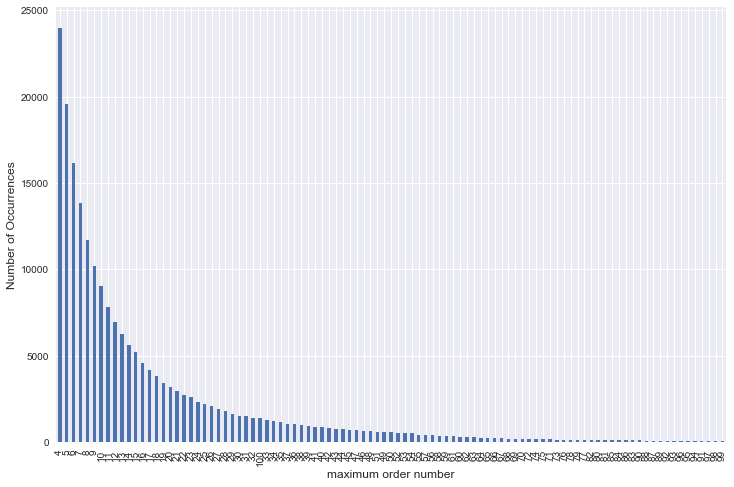

In [22]:
plt.figure(figsize=(12,8))
cnt_srs.plot(kind='bar')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## 3. see how the ordering habit chnages with day of week

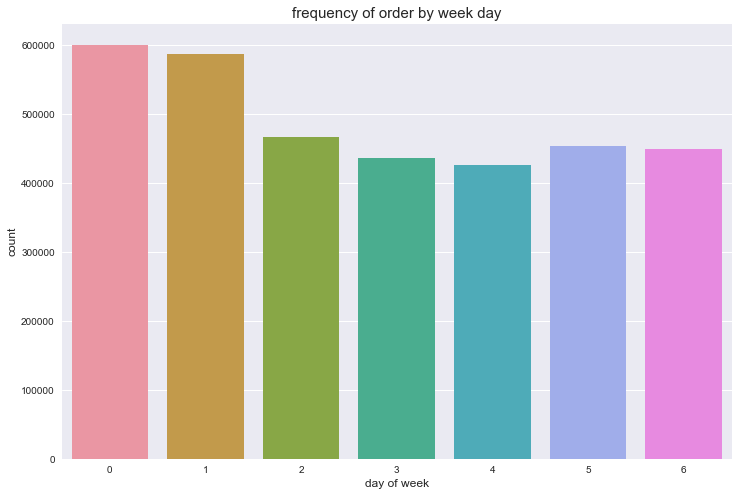

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=orders)
plt.ylabel('count', fontsize=12)
plt.xlabel('day of week', fontsize=12)
plt.title('frequency of order by week day', fontsize=15)
plt.show()

## 4. see how the distribution is with respect to time of the day

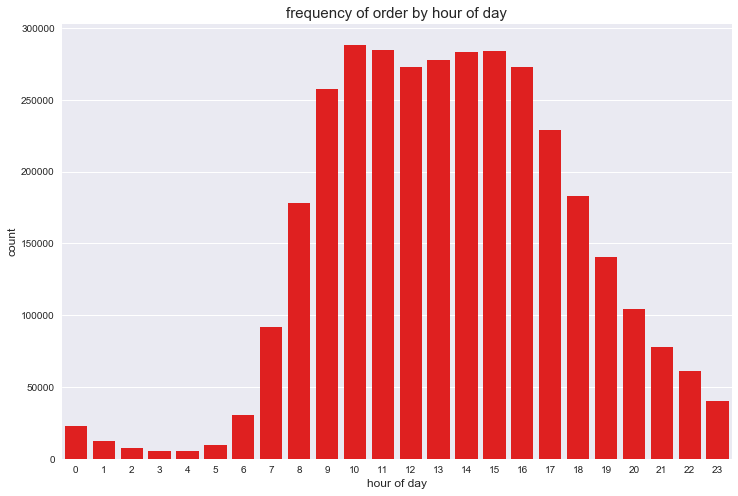

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_hour_of_day', data=orders, color='red')
plt.xlabel('hour of day', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title('frequency of order by hour of day', fontsize=15)
plt.show()

## 5. combine the day of week and hour of day to see the distribution

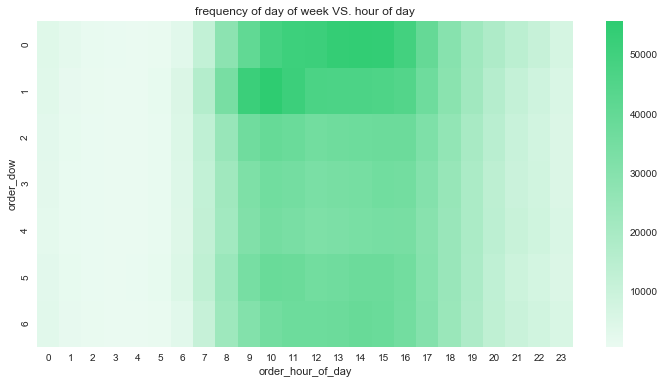

In [26]:
##grouped_df=orders.groupby(['order_dow','order_hour_of_day'])['order_number'].count()
grouped_df=orders.groupby(['order_dow','order_hour_of_day'])['order_number'].agg('count').reset_index()
grouped_df=grouped_df.pivot('order_dow','order_hour_of_day','order_number')

plt.figure(figsize=(12,6))
cmap=sns.light_palette("#2ecc71", as_cmap=True)
##as_camp: if true, return as a matplotlib colormap instead of list
sns.heatmap(grouped_df, cmap=cmap)
plt.title('frequency of day of week VS. hour of day')
plt.show()

## 6. check the time interval between the orders

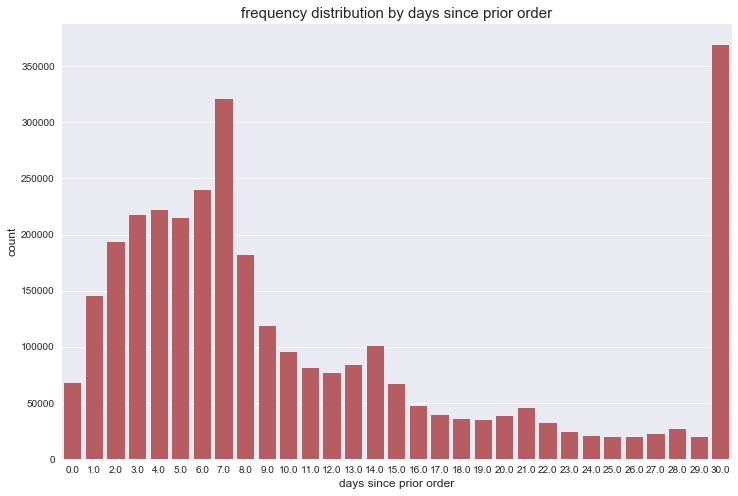

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=orders, color=color[2])
plt.ylabel('count', fontsize=12)
plt.xlabel('days since prior order', fontsize=12)
plt.title('frequency distribution by days since prior order', fontsize=15)
plt.show()

## 7. check out the re-order percentage in prior set and train set

In [28]:
order_prior.shape

(32434489, 4)

In [29]:
order_prior.shape[0]

32434489

In [30]:
order_prior.reordered.sum()
# order_prior['reordered'].sum()

19126536

In [37]:
# percentage of re-order in prior set
order_prior.reordered.sum()/order_prior.shape[0]*100

58.969746679221615

In [33]:
# percentage of re-order in train set
order_train.reordered.sum()/order_train.shape[0]*100

59.859441275096295

 => on an average, about 59% of the products in an order are re-ordered products
 
## 8. check no re-ordered products

In [40]:
grouped_df=order_prior.groupby('order_id')['reordered'].agg('sum').reset_index()
grouped_df.head(5)

,order_id,reordered
0,2,6
1,3,8
2,4,12
3,5,21
4,6,0


In [38]:
grouped_df['reordered'].loc[grouped_df['reordered']>1]=1
# 1: re-order, 0: no re-order
grouped_df.reordered.value_counts()/grouped_df.shape[0] *100

1    87.915141
0    12.084859
Name: reordered, dtype: float64

In [39]:
grouped_df=order_train.groupby('order_id')['reordered'].agg('sum').reset_index()
grouped_df['reordered'].loc[grouped_df['reordered']>1]=1
grouped_df.reordered.value_counts() / grouped_df.shape[0] *100

1    93.444047
0     6.555953
Name: reordered, dtype: float64

- about 12% of the orders in prior set has no re-order
- bout 6.5% of the order in train set has no re-order

## 9. see the number of products bought in each order

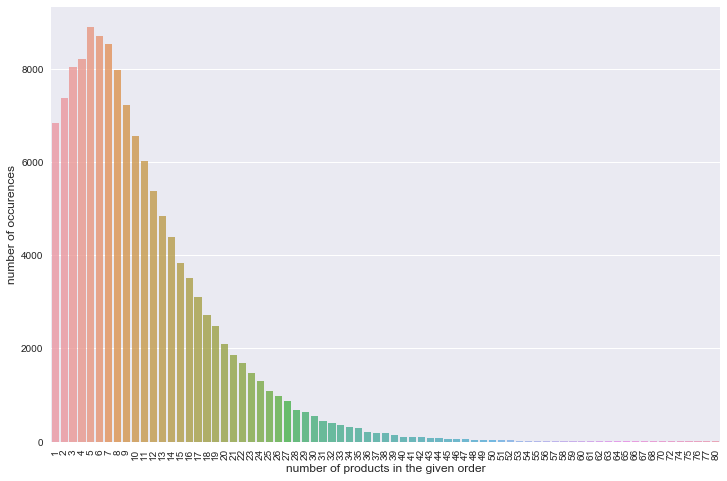

In [43]:
grouped_df=order_train.groupby('order_id')['add_to_cart_order'].agg('max').reset_index()
cnt_srs=grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('number of occurences', fontsize=12)
plt.xlabel('number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


a right tailed distribution with the maximum value at 5

***
### about PRODUCTS

In [44]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [45]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [46]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol




## 10. MERGE these product details with the order_prior details

In [47]:
order_prior=pd.merge(order_prior, products, on='product_id', how='left')
order_prior=pd.merge(order_prior, aisles, on='aisle_id', how='left')
order_prior=pd.merge(order_prior, departments, on='department_id', how='left')
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [48]:
cnt_srs=order_prior['product_name'].value_counts().reset_index().head(20)
# cnt_srs=cnt_srs.rename(columns={'index':'product_name', 'product_name':'frequency_count'})
cnt_srs.columns=['product_name','frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


## 11. look at the important aisles

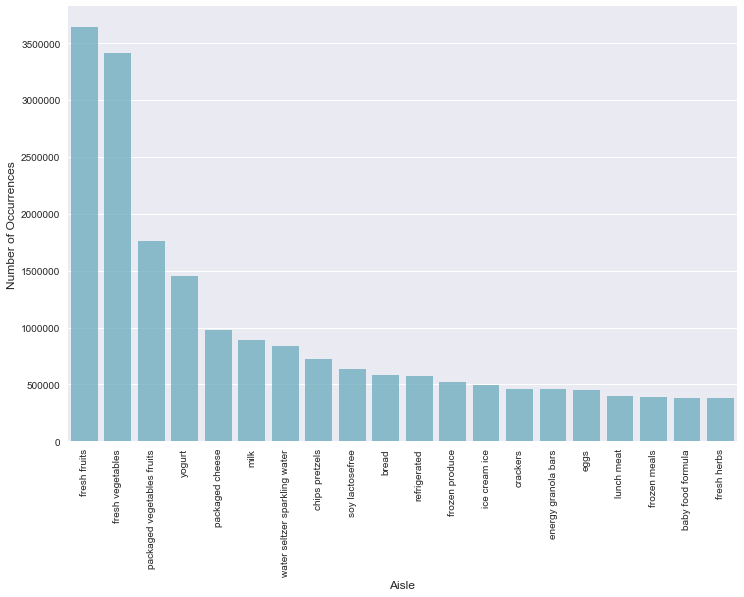

In [50]:
cnt_srs=order_prior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## 12. check department distribution (the department wise distribution)

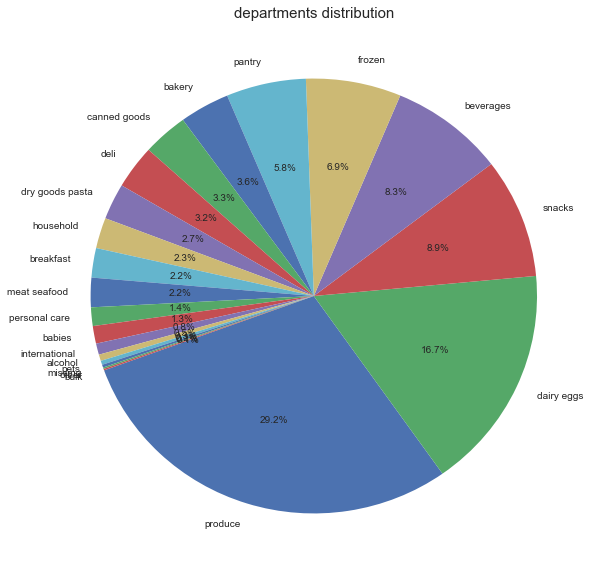

In [51]:
temp_series=order_prior['department'].value_counts()
label=np.array(temp_series.index)
size=np.array(temp_series/temp_series.sum()*100)

plt.figure(figsize=(10,10))
plt.pie(size, labels=label, autopct='%1.1f%%', startangle=200)
plt.title('departments distribution', fontsize=15)
plt.show()

## 13. check the reordered percentage of each department (department wise reorder ratio)

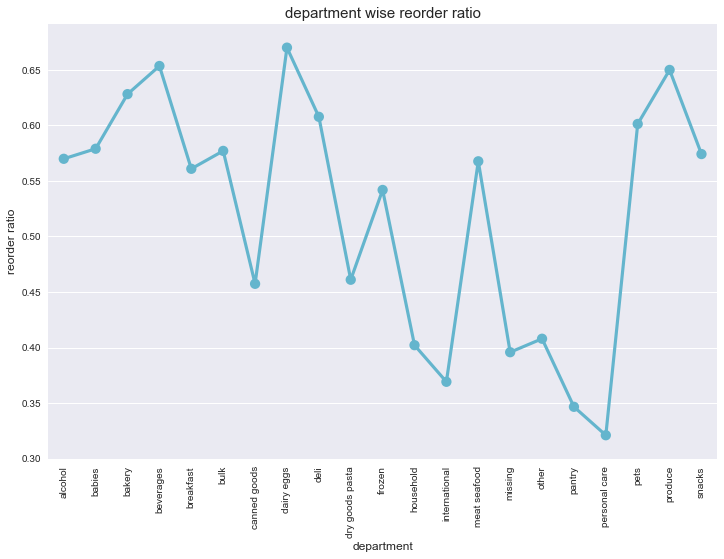

In [52]:
grouped_df=order_prior.groupby('department')['reordered'].agg('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[5])
plt.ylabel('reorder ratio',fontsize=12)
plt.xlabel('department', fontsize=12)
plt.title('department wise reorder ratio', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

## 14. aisle reorder ratio

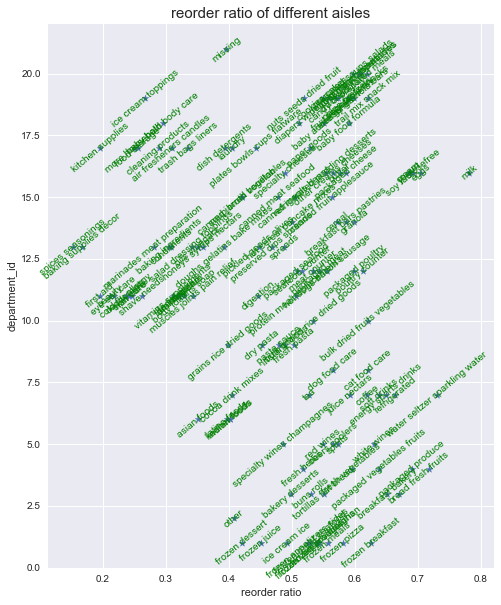

In [53]:
grouped_df=order_prior.groupby(['department_id','aisle'])['reordered'].agg('mean').reset_index()

"""
plt.figure(figsize=(8,10))
plt.scatter(grouped_df.reordered.values, grouped_df.department_id.values, marker='*')
for i, txt in enumerate(grouped_df.aisle.values):
    plt.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]),
                rotation=40, ha='center', va='center', color='green')
"""

fig, ax=plt.subplots(figsize=(8,10))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values, marker='*')
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]),
                rotation=40, ha='center', va='center', color='green')
plt.xlabel('reorder ratio')
plt.ylabel('department_id')
plt.title('reorder ratio of different aisles', fontsize=15)
plt.show()

## 15. add to cart-reorder ratio

C:\Users\sol\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


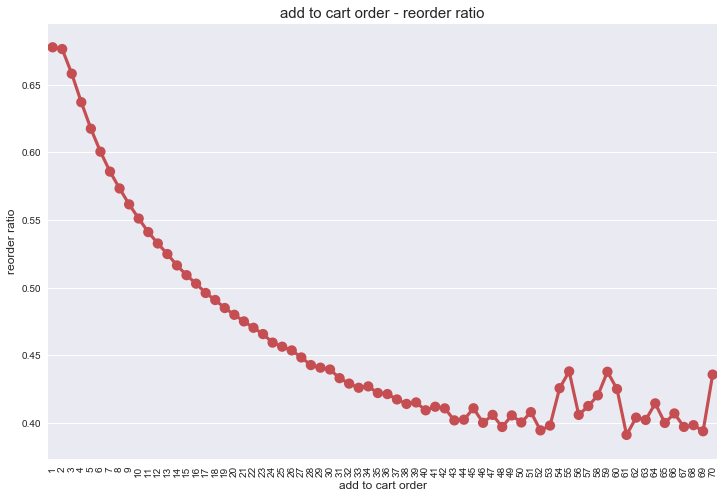

In [54]:
# explore the relationship between how order of adding the product to the cart 
# affects the reorder ration

order_prior['add_to_cart_mod']=order_prior['add_to_cart_order'].copy()
order_prior['add_to_cart_mod'].loc[order_prior['add_to_cart_mod']>70]=70
grouped_df=order_prior.groupby(['add_to_cart_mod'])['reordered'].agg('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('reorder ratio', fontsize=12)
plt.xlabel('add to cart order', fontsize=12)
plt.title('add to cart order - reorder ratio', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


* looks like the products that are added to the cart initially are more likely to be reordered again 
* compared to the ones added later. this makes senses to him as well we tend to first order all the products
* we used to buy frequently and then look out for the new products available

## 16. reorder ratio by time based variables

In [55]:
order_train.head(10)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


#### 6-1. 요일별 재주문율

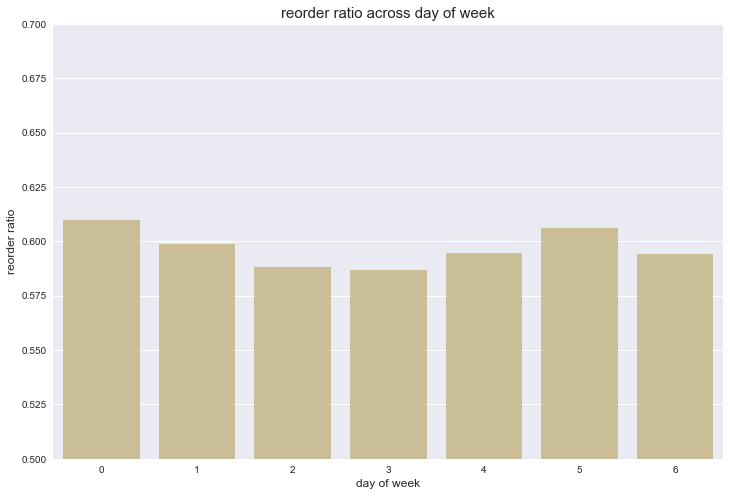

In [56]:
order_train=pd.merge(order_train, orders, on='order_id', how='left')
order_train.head()
grouped_df=order_train.groupby(['order_dow'])['reordered'].agg('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylim(0.5, 0.7)
plt.ylabel('reorder ratio', fontsize=12)
plt.xlabel('day of week', fontsize=12)
plt.title('reorder ratio across day of week', fontsize=15)
plt.show()

#### 16-2. 시간별 재주문율

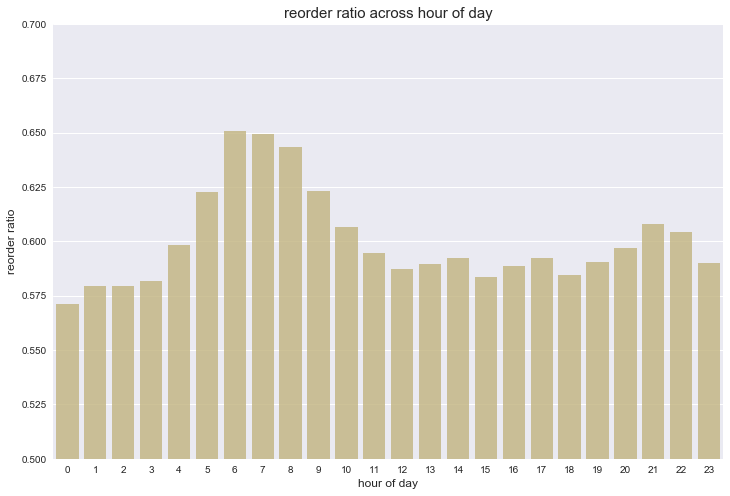

In [57]:
grouped_df=order_train.groupby(['order_hour_of_day'])['reordered'].agg('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylim(0.5, 0.7)
plt.ylabel('reorder ratio', fontsize=12)
plt.xlabel('hour of day', fontsize=12)
plt.title('reorder ratio across hour of day', fontsize=15)
plt.show()

#### 16-3. 요일별, 시간별 재주문율

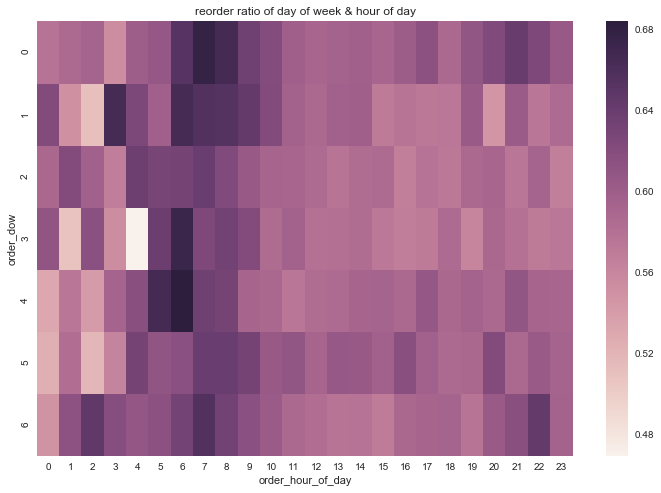

In [58]:
grouped_df=order_train.groupby(['order_dow','order_hour_of_day'])['reordered'].agg('mean').reset_index()
grouped_df=grouped_df.pivot('order_dow','order_hour_of_day','reordered')

plt.figure(figsize=(12,8))
sns.heatmap(grouped_df)
plt.title('reorder ratio of day of week & hour of day')
plt.show()

reorder ratios are quite high during the ealry mornings compared to later half of the day